# Day 44

## Decision Tree Regression

## Project name
## **Price Prediction of Used Cars**

Steps:
1. Import libraries
2. Import the Dataset
3. Perform the Data Analysis and EDA
4. Spliting the Data
5. [Optional] Data Preprocessing - Feature scalling
6. Choosing a model - Decision Tree Regressor
7. Training the Model
8. Testing the Model
9. Checking the performance of the model

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
### Problem Statement

### Importing the Dataset

Link : https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [3]:
df = pd.read_csv ("https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv")

### Data Analysis and EDA

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [6]:
df.ndim

2

In [7]:
df.shape

(4340, 8)

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
print(df.fuel.unique())
print(df.seller_type.unique())
print(df.transmission.unique())
print(df.owner.unique())

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [12]:
# Create a column new_fuel and place at the index of the fuel column.
# Replace the Values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4

# X = df.fuel.replace({"Petrol" : 0, "Diesel":1, "CNG":2, "LPG":3, "Electric":4})
# df.insert(df.columns.get_loc("fuel")+1,"new_fuel", X)

In [13]:
# df.new_fuel.unique()

In [14]:
# Create a column new_seller_type and place at the index of the seller_type column.
# Replace the Values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2
# Y = df.seller_type.replace({'Individual': 0, 'Dealer':1, "Trustmark Dealer":2})
# df.insert(df.columns.get_loc("seller_type")+1, "new_seller_type",Y)

In [15]:
# df.new_seller_type.unique()

In [16]:
# Create a column new_transmission and place at the index of the transmission column.
# Replace the Values:
# Manual - 0
# Automatic - 1


In [17]:
# Create a column new_owner and place at the index of the owner column.
# Replace the Values:
# First Owner - 0
# Second Owner - 1
# Fourth & Above Owner - 2
# Third Owner- 3
# Test Drive Car - 4

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [19]:
from sklearn.preprocessing import LabelEncoder
df.fuel = LabelEncoder().fit_transform(df.fuel)
df.seller_type = LabelEncoder().fit_transform(df.seller_type)
df.transmission = LabelEncoder().fit_transform(df.transmission)
df.owner = LabelEncoder().fit_transform(df.owner)

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [21]:
# Create a column no_of_year = current_year - year
df['current_year'] = 2023

In [22]:
df['no_of_year'] = df.current_year - df.year

In [23]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_year
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2023,16
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2023,16
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2023,11
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2023,6
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2023,9


In [24]:
# Drop columns - name, year, current_year
df.drop(columns=['name', 'year', 'current_year'], axis=1, inplace= True)

In [25]:
# Rename selling_price to current_selling_price
df.rename(columns={'selling_price':'current_selling_price'}, inplace=True)

In [26]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
0,60000,70000,4,1,1,0,16
1,135000,50000,4,1,1,0,16
2,600000,100000,1,1,1,0,11
3,250000,46000,4,1,1,0,6
4,450000,141000,1,1,1,2,9


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int32
 3   seller_type            4340 non-null   int32
 4   transmission           4340 non-null   int32
 5   owner                  4340 non-null   int32
 6   no_of_year             4340 non-null   int64
dtypes: int32(4), int64(3)
memory usage: 169.7 KB


In [28]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_year
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_year,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


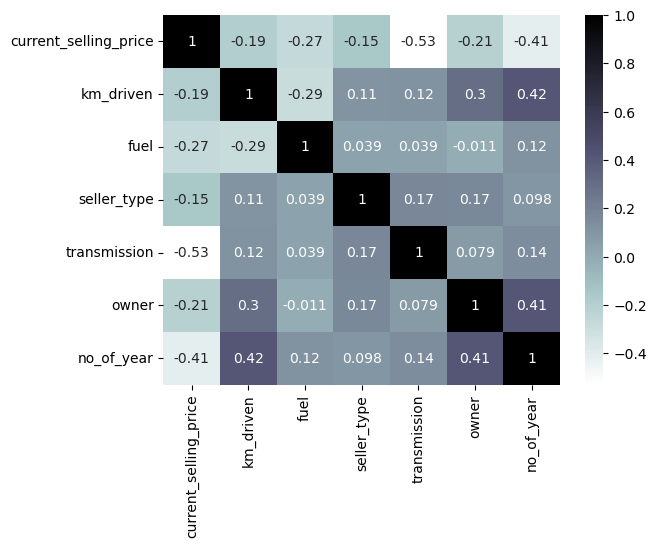

In [29]:
sns.heatmap(df.corr(), annot=True, cmap = "bone_r");

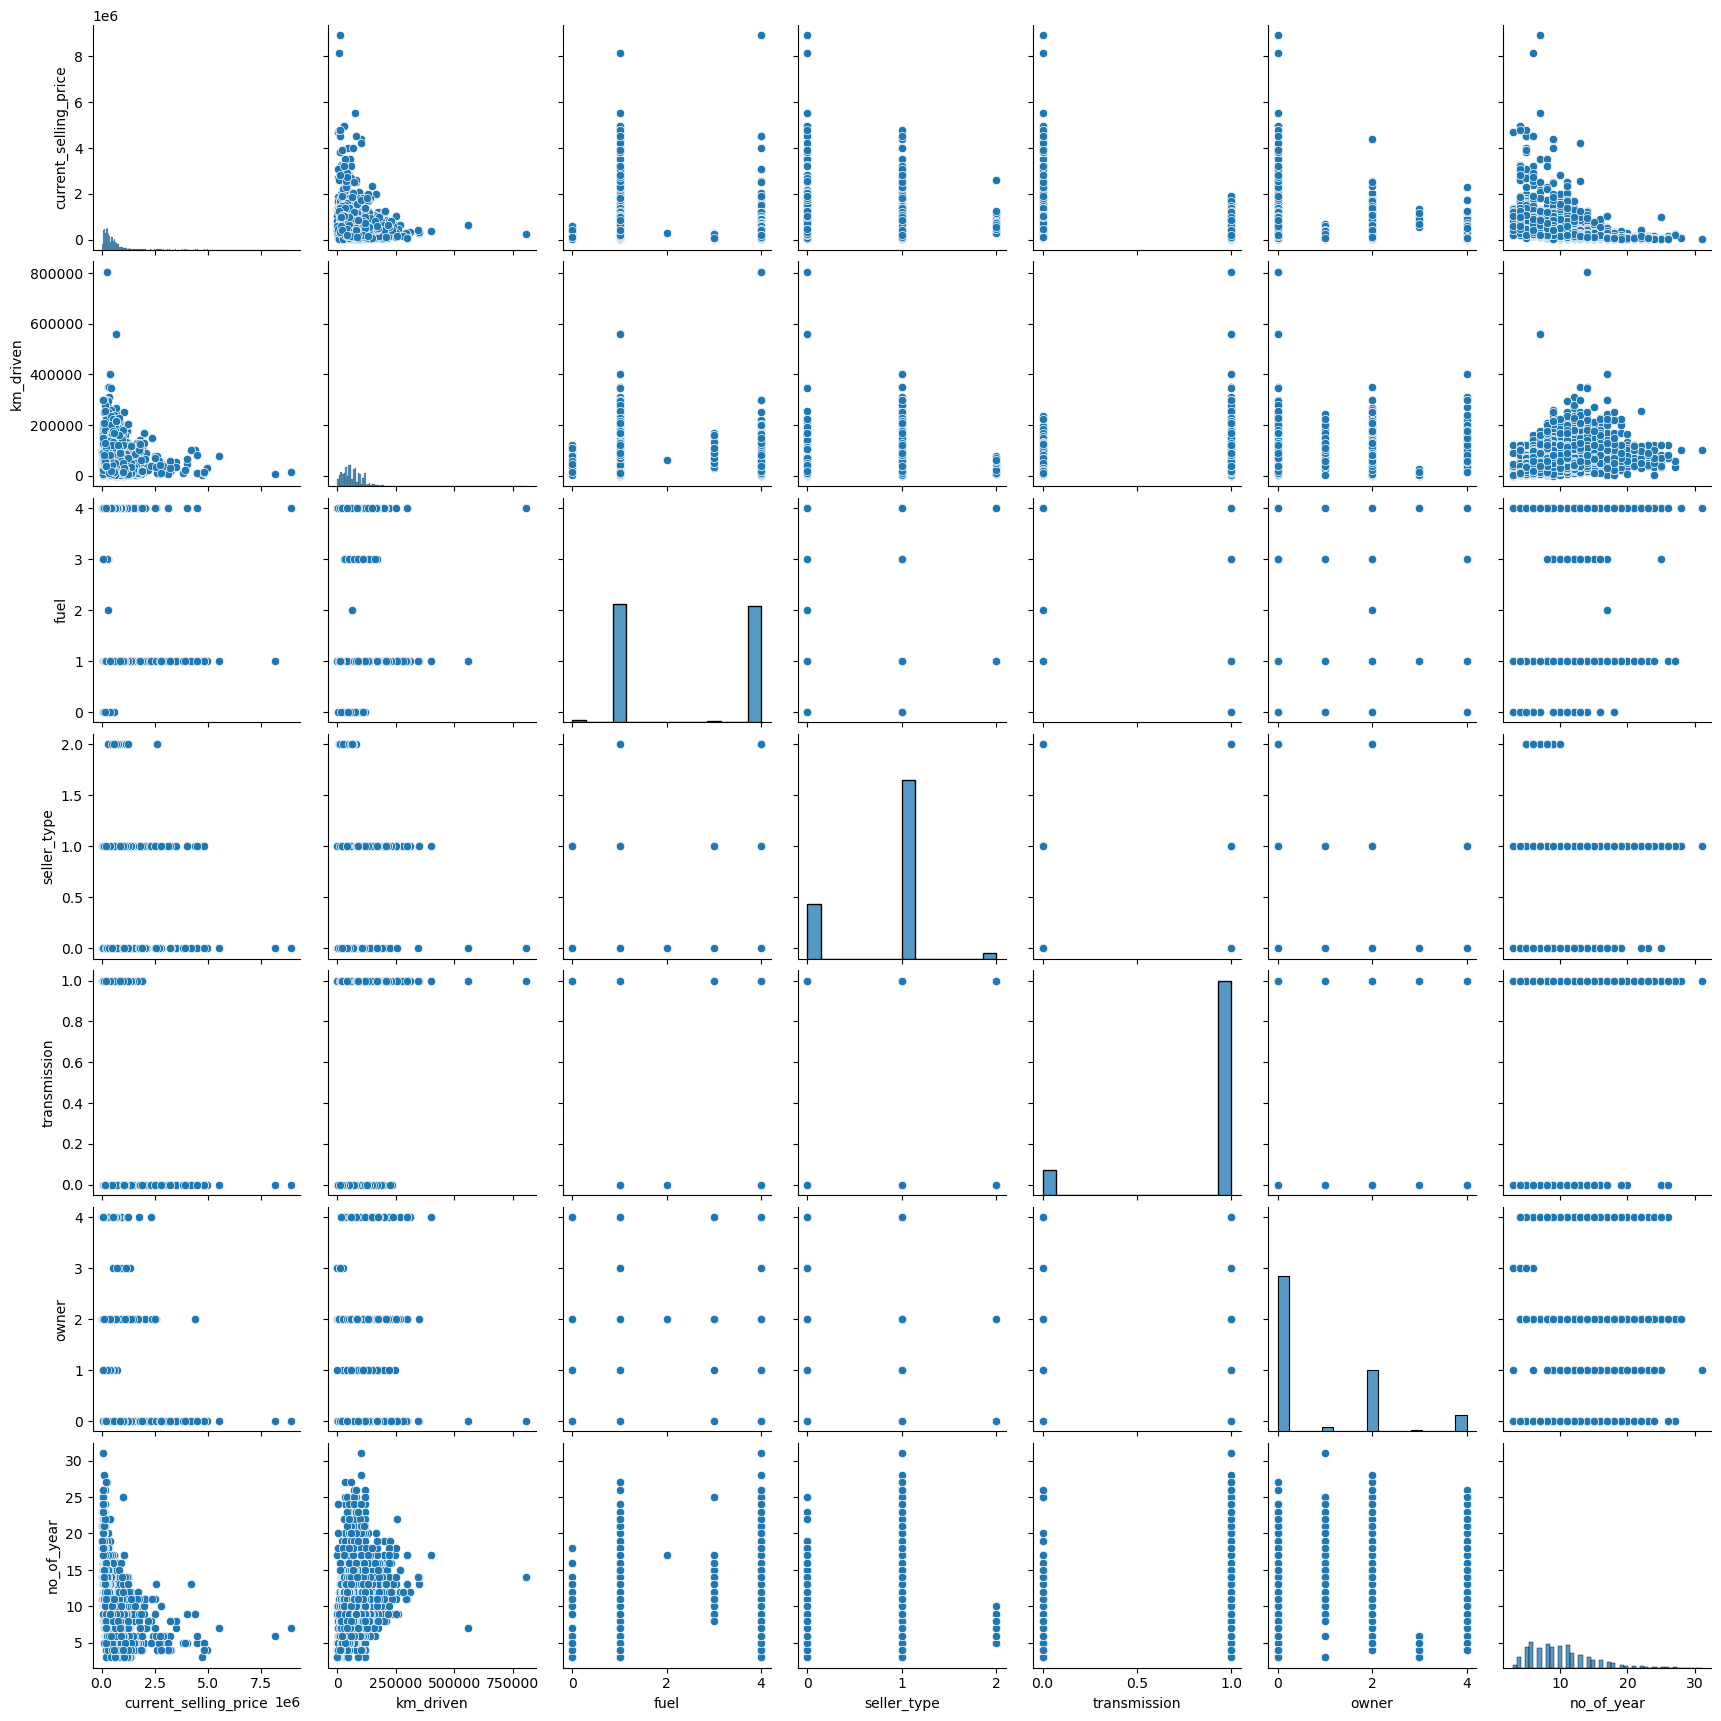

In [30]:
sns.pairplot(df);

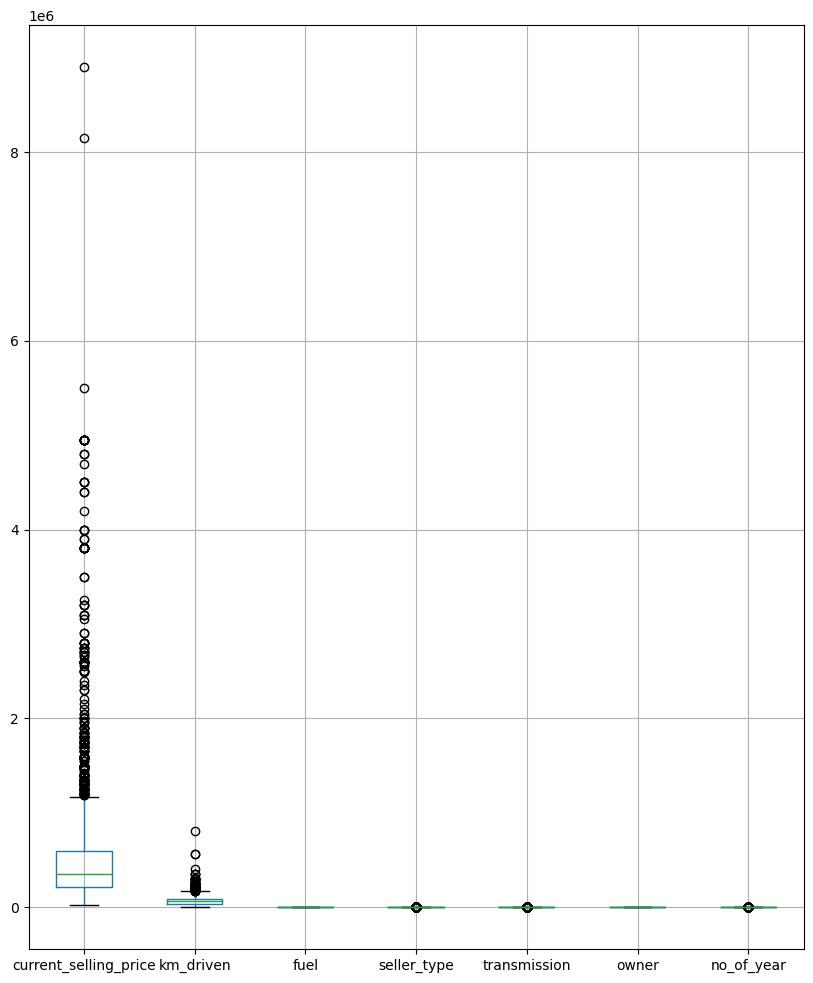

In [31]:
plt.figure(figsize = (10,12))
df.boxplot();

### Select the features and Targets

In [32]:
X = np.array(df.drop(columns='current_selling_price', axis=1))
y = np.array(df.current_selling_price)

In [33]:
X

array([[ 70000,      4,      1,      1,      0,     16],
       [ 50000,      4,      1,      1,      0,     16],
       [100000,      1,      1,      1,      0,     11],
       ...,
       [ 83000,      4,      1,      1,      2,     14],
       [ 90000,      1,      1,      1,      0,      7],
       [ 40000,      4,      1,      1,      0,      7]], dtype=int64)

In [34]:
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000], dtype=int64)

### Feature Selection
### Feature Scaling

### Spliting the Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [36]:
print(len(X_train), len(X_test))

3472 868


In [37]:
print(len(y_train), len(y_test))

3472 868


### Choosing the Model

In [38]:
model = DecisionTreeRegressor()

### Training the model

In [39]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [40]:
model.predict(X_test)

array([ 383999.90909091,  399375.        ,  190000.        ,
        475000.        ,  300000.        ,  477500.        ,
        315000.        ,  110000.        , 2490000.        ,
        110000.        ,  233333.33333333,  460000.        ,
        125000.        , 1150000.        ,  140000.        ,
        730000.        ,  181249.75      ,  290000.        ,
        762500.        ,  725000.        ,  380000.        ,
        625000.        ,  225000.        ,  525000.        ,
        525000.        ,  400000.        ,  760000.        ,
        260000.        ,  625000.        ,  110000.        ,
        377000.        ,  450000.        ,  450000.        ,
        650000.        ,  330000.        , 1750000.        ,
        173500.        ,  289000.        ,  300000.        ,
        414571.14285714, 1300000.        ,  465000.        ,
       1000000.        ,  732500.        ,   60000.        ,
        650000.        ,  419000.        ,  483333.33333333,
        110000.        ,

In [46]:
y_test

array([ 300000,  600000,  170000,  925000,  400000,  300000,  430000,
         90000, 4000000,   85000,  250000,  227000,  135000, 1150000,
        650000,  409999,  130000,  185000,  484999,  725000,  470000,
        625000,  330000,  919999,  525000,  250000,  760000,  400000,
        650000,  110000,  290000,  450000,  760000,  650000,  330000,
       1150000,  210000,  165000, 1900000,  600000, 1300000,  250000,
        750000,  695000,   75000,  650000,  200000,  395000,  250000,
        450000,  225000,  760000,  229999,  750000,  250000,  250000,
        400000,  239000,  210000,  170000,  600000,  240000,  599000,
       1300000,  270000,  450000,  890000,  400000,  170000,  650000,
        480000,  140000,  225000,  425000,   80000,  550000,  260000,
        800000,  100000,  969999,  450000,  300000,  380000,  550000,
         80000,  550000,  300000,  550000,  350000,   85000,  400000,
        360000,  190000,  350000,  700000,   95000,  310000,  165000,
        675000,  550

In [41]:
y_pred = model.predict(X_test)

### Testing the model

In [42]:
target = pd.DataFrame({'Actual_value': y_test, "Predicted_value": y_pred})
target

,Actual_value,Predicted_value
0,300000,383999.909091
1,600000,399375.000000
2,170000,190000.000000
3,925000,475000.000000
4,400000,300000.000000
...,...,...
863,80000,229999.000000
864,459999,470000.000000
865,434999,515000.000000
866,300000,346600.000000


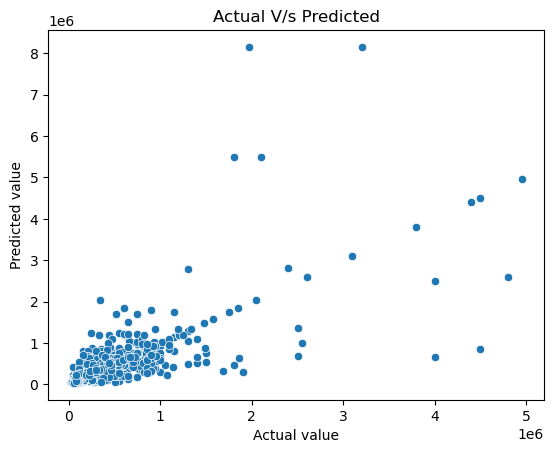

In [43]:
sns.scatterplot(x = y_test, y = y_pred);
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual V/s Predicted");

In [51]:
print(X_test.shape)
print(X_test.shape)
print(y_pred.reshape(-1).shape)

(868, 6)
(868, 6)
(868,)


In [50]:
# sns.scatterplot(X_test, y_test, color='green');
sns.scatterplot(X_test.reshape(-1,1), y_pred, color = 'Yellow');

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Per-column arrays must each be 1-dimensional

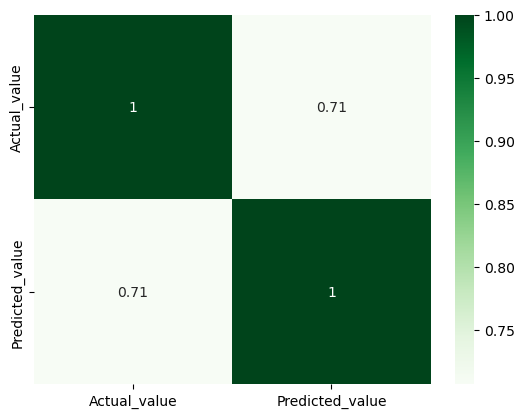

In [ ]:
sns.heatmap(target.corr(), annot=True, cmap="Greens");

### Performance 

In [ ]:
r2_score(y_test, y_pred)

0.2887055745305046

In [ ]:
new_df = df.copy()

In [ ]:
new_df.columns

In [ ]:
new_df = new_df[['fuel', 'seller_type']]

In [ ]:
type(new_df)

In [ ]:
new_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
new_df ['fuel'] = LabelEncoder().fit_transform(new_df['fuel'])

In [ ]:
new_df

In [ ]:
new_df.fuel.value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(new_df[['seller_type']])
enc.categories_

In [ ]:
one_hot = enc.transform(new_df[['seller_type']]).toarray()

In [ ]:
new_df[['Dealer', "Individual", 'Trustmark Dealer']]= one_hot

In [ ]:
new_df

In [ ]:
new_df.seller_type.value_counts()

In [ ]:
# Insted of using Onehot encoding and LabelEncoder we can use the Pandas function also but for that we have to create the different
# dataframe and then we have to merge the oandase detaframe and the original detaframe 

# new_df = pd.get_dummies(new_df)
# new_df